In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'1.9.0'

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

In [1]:
import numpy as np

import keras
import keras.backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras import models
from matplotlib import cm

plt.rcParams['figure.figsize'] = (16, 8)


/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'plt' is not defined

In [5]:
# model = load_model("models/4.ResNet-Model.h5")
# model.summary()

In [6]:
img_path = 'data/validation/BCC/hf_ISIC_0027865.jpg'

# We preprocess the image into a 4D tensor
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [7]:
import os
import glob
df_dir= "df"
test_images = glob.glob(os.path.join(df_dir, "*.jpg"))
test_images

['df/CenterCrop_hf_ISIC_0028880.jpg',
 'df/CenterCrop_hf_ISIC_0025980.jpg',
 'df/CenterCrop_hf_ISIC_0025373.jpg',
 'df/CenterCrop_hf_ISIC_0026254.jpg',
 'df/CenterCrop_hf_ISIC_0024330.jpg',
 'df/CenterCrop_hf_ISIC_0026313.jpg']

In [8]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
%matplotlib inline


In [9]:
imageSize=224
train_dir = "data2/train/"
# validation_dir = 'data2/validation/'
# test_dir =  "data/test/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['DF']:
                label = 0
            elif folderName in ['BCC']:
                label = 1
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3), mode='constant')
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)
# X_val, y_val = get_data(validation_dir)
# X_test, y_test= get_data(test_dir)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2) 

from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 2)
# y_valHot = to_categorical(y_val, num_classes = 2)
# y_testHot = to_categorical(y_test, num_classes = 2)

100%|██████████| 21/21 [00:00<00:00, 121.34it/s]


In [10]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

In [11]:
for layer in model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [12]:
from vis.visualization import visualize_saliency
from vis.visualization import visualize_cam
from vis.utils import utils
from keras import activations


layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1
idx=6

In [13]:
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=X_train[idx], backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=X_train[idx], backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=X_train[idx], backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=X_train[idx], backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=X_train[idx], backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=X_train[idx], backprop_modifier='relu')

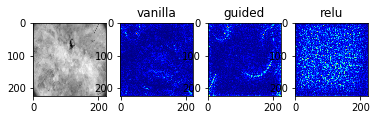

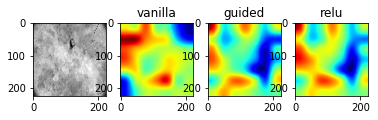

In [21]:
plt.figure(figsize=(16,8))

f, ax = plt.subplots(1, 4)
ax[0].imshow(X_train[idx][..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(X_train[idx][..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

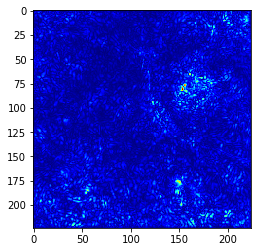

In [15]:
idx= 5
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

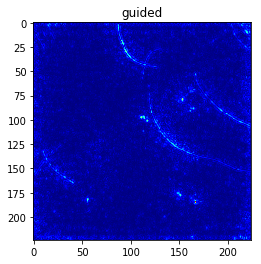

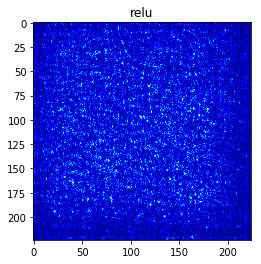

In [16]:
for modifier in ['guided', 'relu']:
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                               seed_input=X_train[idx], backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

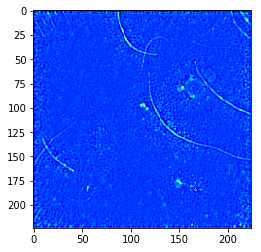

In [17]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx], 
                           backprop_modifier='guided', grad_modifier='negate')
plt.imshow(grads, cmap='jet')

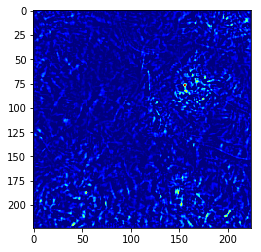

In [18]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx], 
                           backprop_modifier=None, grad_modifier="relu")
plt.imshow(grads, cmap='jet')

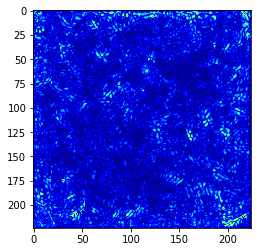

In [19]:
idx=8
class_idx = 20

from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

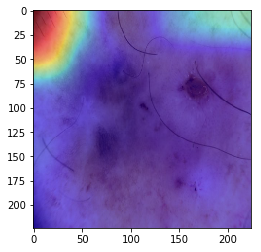

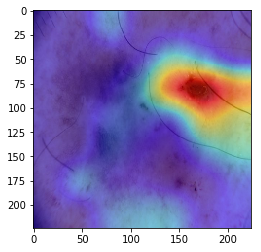

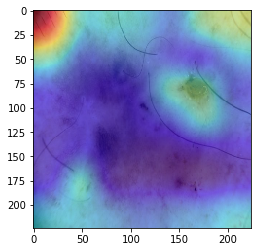

In [22]:
from vis.visualization import visualize_cam
from vis.visualization import visualize_saliency, overlay

img = utils.load_img('data2/train/DF/hf_ISIC_0024973.jpg', target_size=(224, 224))
modifiers = [None, 'negate', 'small_values']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=img, grad_modifier=modifier)
    plt.figure()
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.5))

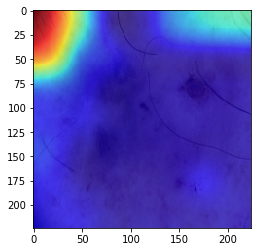

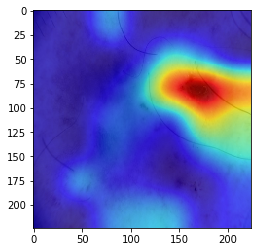

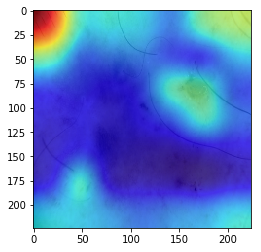

In [23]:
from vis.visualization import visualize_cam

img = utils.load_img('data2/train/DF/hf_ISIC_0024973.jpg', target_size=(224, 224))
modifiers = [None, 'negate', 'small_values']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=img, grad_modifier=modifier)
    plt.figure()
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.3))

In [24]:
n_images = 5
start_index = 5
heat_map = np.zeros((n_images, 224, 224, 3), dtype=int)
print(heat_map.shape)

for i in range(n_images):
    heat_map[i][:,:,:] = visualize_cam(model, 20, None, X_train[start_index + i])

(5, 224, 224, 3)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0b80ee5510> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

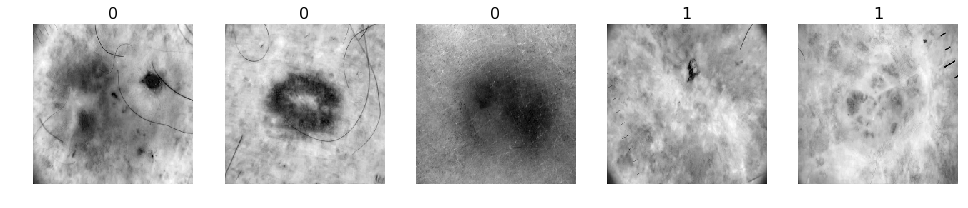

In [25]:
def plots(ims, figsize=(20,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i][:, :, 0], cmap='gray')

def cplots(ims, figsize=(20,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i][:, :, :])

cplots(heat_map[:n_images], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])
plots(X_train[start_index:(start_index + n_images)], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])

(5, 224, 224, 3)
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0b80ee5510> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

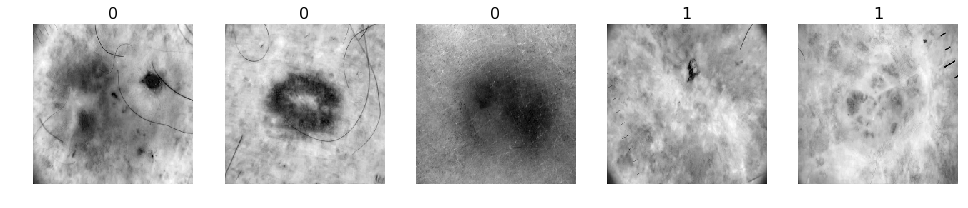

In [26]:
n_images = 5
start_index = 5
heat_map = np.zeros((n_images, 224, 224, 3), dtype=int)
print(heat_map.shape)

for i in range(n_images):
    heat_map[i][:,:,:] = visualize_cam(model, 17, None, X_train[start_index + i])
    

cplots(heat_map[:n_images], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])
plots(X_train[start_index:(start_index + n_images)], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])

(5, 224, 224, 3)
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0b80ee5510> (for post_execute):


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

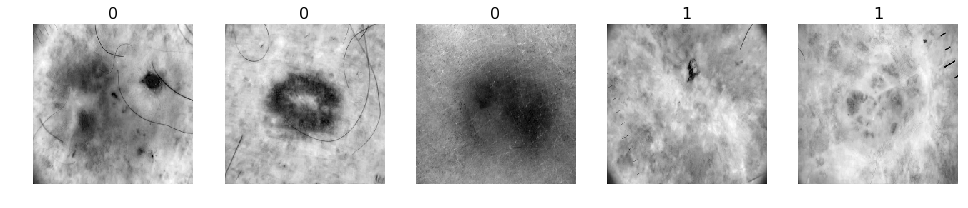

In [27]:
n_images = 5
start_index = 5
heat_map = np.zeros((n_images, 224, 224, 3), dtype=int)
print(heat_map.shape)

for i in range(n_images):
    heat_map[i][:,:,:] = visualize_cam(model, 18, None, X_train[start_index + i])
    

cplots(heat_map[:n_images], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])
plots(X_train[start_index:(start_index + n_images)], figsize=(20,5), rows=1, titles=y_train[start_index:(start_index + n_images)])

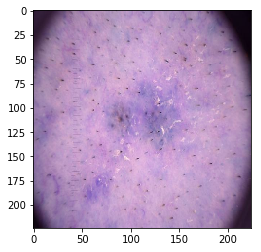

In [28]:
idx=18
plt.imshow(X_train[idx])

In [29]:
x = np.expand_dims(X_train[idx], axis=0)

In [30]:
model.predict(x, verbose=1)[0].argmax(axis=0)

1/1 [==============================] - 0s 323ms/step


999

In [31]:
y_train[idx]

1

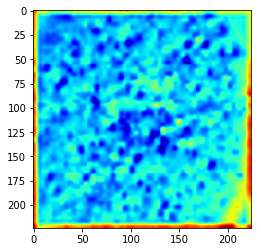

In [32]:
plt.imshow(visualize_cam(model=model, layer_idx=utils.find_layer_idx(model, 'block5_conv1'),
                         filter_indices=None, seed_input=np.asarray(X_train[idx]), 
                         penultimate_layer_idx=utils.find_layer_idx(model, 'block2_pool'),
                         backprop_modifier=None, grad_modifier=None))

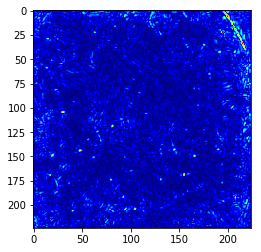

In [33]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

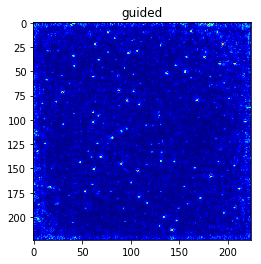

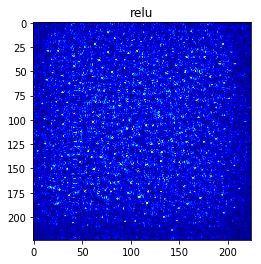

In [34]:
for modifier in ['guided', 'relu']:
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                               seed_input=X_train[idx], backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

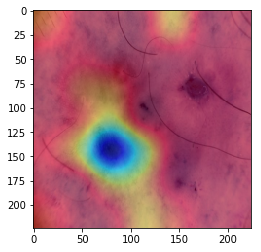

In [36]:
img = cv2.imread("data2/train/DF/hf_ISIC_0024973.jpg")
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

heatmap = visualize_cam(model, layer_idx, filter_indices = 80, seed_input=img)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)

attention_img = overlay(heatmap, img)
plt.imshow(attention_img)